Initial Average Age: 6.33

Instrument ages each year:
      Instrument 1  Instrument 2  Instrument 3  Instrument 4  Instrument 5  \
Year                                                                         
2024             6            12             3             3             4   
2025             7            13             4             4             5   
2026             8            14             5             5             6   
2027             9             0             6             6             7   
2028            10             1             7             7             8   
2029            11             2             8             8             9   
2030            12             3             9             9            10   
2031            13             4            10            10            11   
2032            14             5            11            11            12   
2033             0             6            12            12            13   
2034      

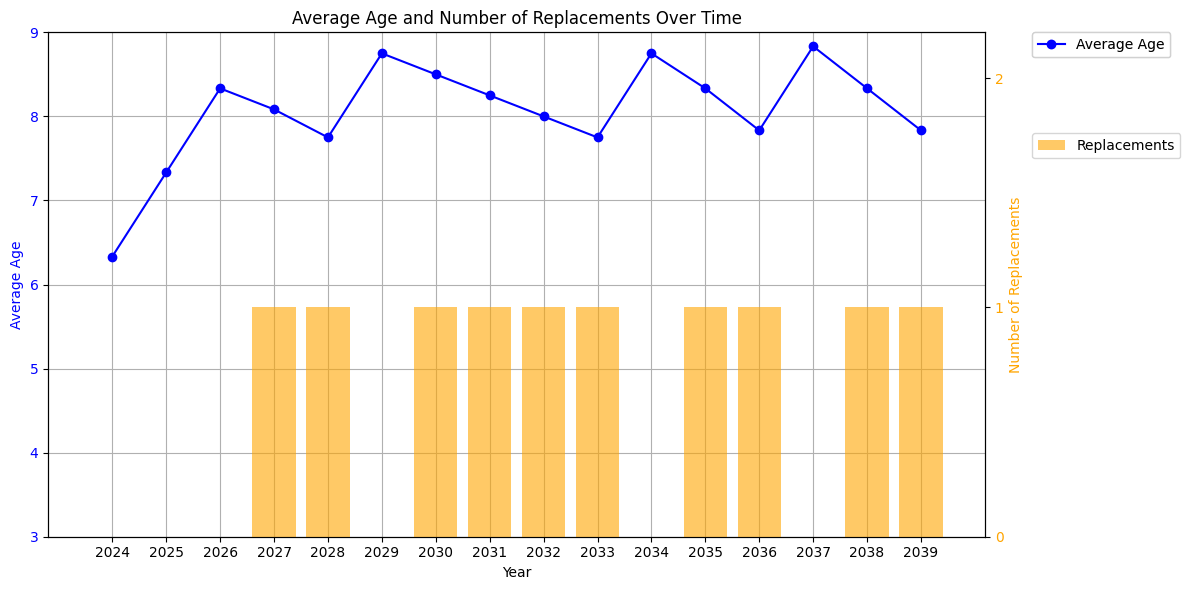

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Initial ages of the instruments
# instruments = [18, 18, 6, 12, 3, 3, 10, 4, 7, 12, 0, 9, 8, 6, 6]

"""
CF3	18 r
CF4	18 r
CF6	6
HCF1	12
HCF2	3
HCF3	3
SR1	10 r
LS1	4
WF1	7
HWF1	12
HMI1	0
WF3	9
WF4-HC	8
WF5	6
WF6	6
"""

instruments = [6, 12, 3, 3, 4, 7, 12, 0, 9, 8, 6, 6]


# Initial average age calculation
initial_average_age = sum(instruments) / len(instruments)
print(f"Initial Average Age: {initial_average_age:.2f}")

# Duration of the simulation in years
years = 15

# Start year
start_year = 2024

# Target average age for the instruments
target_average_age = 9

# Lists to store data for visualization
average_ages = [initial_average_age]
replacements_count = [0]
instrument_ages_each_year = [instruments[:]]  # Start with a copy of initial ages

# Simulation of aging and replacement process
for year in range(years):
    # Age all instruments by 1 year
    instruments = [age + 1 for age in instruments]

    # Count replacements this year
    num_replacements = 0

    # Replace up to 2 oldest instruments if average age is >= target average age
    while num_replacements < 2 and sum(instruments) / len(instruments) >= target_average_age:
        # Find the index of the oldest instrument(s)
        oldest_index = instruments.index(max(instruments))

        # Replace the oldest instrument with a new one (age 0)
        instruments[oldest_index] = 0
        num_replacements += 1

    # Calculate average age after replacement
    average_age = sum(instruments) / len(instruments)
    average_ages.append(average_age)

    # Append the number of replacements to the list
    replacements_count.append(num_replacements)

    # Record the ages of instruments for this year
    instrument_ages_each_year.append(instruments[:])

# Generate a list of years for the x-axis labels
year_labels = list(range(start_year, start_year + years + 1))

# Create a DataFrame for yearly instrument ages
instrument_df = pd.DataFrame(instrument_ages_each_year, index=year_labels)
instrument_df.index.name = "Year"
instrument_df.columns = [f"Instrument {i+1}" for i in range(len(instruments))]
print("\nInstrument ages each year:")
print(instrument_df)

# Create a DataFrame to represent the summary data
summary_data = {
    'Year': year_labels,
    'Average Age': average_ages,
    'Replacements': replacements_count
}
summary_df = pd.DataFrame(summary_data)
print("\nSummary data (average age and replacements per year):")
print(summary_df)

# Plotting the results in a combined graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average ages
ax1.plot(year_labels, average_ages, marker='o', linestyle='-', color='blue', label='Average Age')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Age', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(year_labels)
ax1.set_ylim(3, 9)  # Set y-axis range from 3 to 9 years
ax1.grid(True)

# Create a secondary y-axis for replacements
ax2 = ax1.twinx()
ax2.bar(year_labels, replacements_count, color='orange', alpha=0.6, label='Replacements')
ax2.set_ylabel('Number of Replacements', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylim(0, 2.2)  # Set replacement y-axis range from 0 to 2

# Add legends outside the grid
ax1_legend = ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
ax2_legend = ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.8), borderaxespad=0)

# Add both legends to the figure
fig.add_artist(ax1_legend)

plt.title('Average Age and Number of Replacements Over Time')
plt.tight_layout()
plt.show()
